In [7]:
### First, we need to import required libraries.
## below are the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import style

In [3]:
##In this step, we need to read our csv file in order to do the other steps.
data = pd.read_csv("C:/Users/Nasim/Desktop/ITC 300/Breast_Cancer.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Nasim/Desktop/ITC 300/Breast_Cancer.csv'

In [394]:
#changing Names of some cols for better understanding:
data = data.rename(columns={"Marital Status":"Marital_Status","T Stage":"T_Stage","N Stage":"N_Stage","6th Stage":"Sixth_Stage",
                        "A Stage":"A_Stage","Tumor Size":"Tumor_Size","Estrogen Status":"Estrogen_Status",
                        "Progesterone Status":"Progesterone_Status","Regional Node Examined":"RegionalNode_Examined","Reginol Node Positive":"ReginolNode_Positive",
                        "Survival Months":"Survival_Months"})

In [395]:
## To check the dataset in case of  missing values and  null values. 
data.isnull().any()


Age                      False
Race                     False
Marital_Status           False
T Stage                  False
N_Stage                  False
6th_Stage                False
differentiate            False
Grade                    False
A_Stage                  False
Tumor_Size               False
Estrogen_Status          False
Progesterone_Status      False
RegionalNode_Examined    False
ReginolNode_Positive     False
Survival_Months          False
Status                   False
dtype: bool

In [396]:
#To find out the dataype of each variable or column
data.dtypes

Age                       int64
Race                     object
Marital_Status           object
T Stage                  object
N_Stage                  object
6th_Stage                object
differentiate            object
Grade                    object
A_Stage                  object
Tumor_Size                int64
Estrogen_Status          object
Progesterone_Status      object
RegionalNode_Examined     int64
ReginolNode_Positive      int64
Survival_Months           int64
Status                   object
dtype: object

In [33]:
## To find out the numbers of rows and cols:
data.shape

(4024, 16)

In [270]:
data.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage ', 'N_Stage', '6th_Stage',
       'differentiate', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'RegionalNode_Examined', 'ReginolNode_Positive',
       'Survival_Months', 'Status'],
      dtype='object')

In [35]:
#We use describe function for getting number, average, standard deviation, min, max, quantiles of those columns with int datatype.
data.describe()

,Age,Tumor_Size,RegionalNode_Examined,ReginolNode_Positive,Survival_Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [36]:
data.Race.unique()

array(['White', 'Black', 'Other'], dtype=object)

In [37]:
data.Status.unique()

array(['Alive', 'Dead'], dtype=object)

In [38]:
data.Tumor_Size.unique()

array([  4,  35,  63,  18,  41,  20,   8,  30, 103,  32,  13,  59,  15,
        19,  46,  24,  25,  29,  40,  70,  22,  50,  17,  21,  10,  27,
        23,   5,  51,   9,  55, 120,  77,   2,  11,  12,  26,  75, 130,
        34,  80,   3,  60,  14,  16,  45,  36,  76,  38,  49,   7,  72,
       100,  43,  62,  37,  68,  52,  85,  57,  39,  28,  48, 110,  65,
         6, 105, 140,  42,  31,  90, 108,  98,  47,  54,  61,  74,  33,
         1,  87,  81,  58, 117,  44, 123, 133,  95, 107,  92,  69,  56,
        82,  66,  78,  97,  88,  53,  83, 101,  84, 115,  73, 125, 104,
        94,  86,  64,  96,  79,  67], dtype=int64)

In [ ]:
#Data Analysis and Visualization Start from here:

In [54]:
#Question1: What is the percenatge of each race on 2017 based on the SEER Program of the NCI in US? 
races= data.Race.value_counts()*100/4024
races= races.round(decimals=2)
races

White    84.82
Other     7.95
Black     7.23
Name: Race, dtype: float64

In [55]:
#First Question:FirstPart: Finding the Races number per 1000 population:
(data.Race.value_counts()*1000/4024).round(decimals=2)

White    848.16
Other     79.52
Black     72.32
Name: Race, dtype: float64

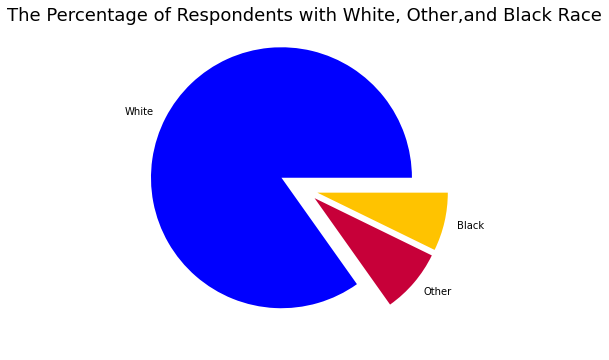

In [403]:
##Visualization of Question1
plt.figure(figsize = (12, 6))
labels=["White","Other","Black"]
plt.pie(races, labels=labels, colors=["b","#C70039","#FFC300"], explode=[0.2,0.1,0.1])
plt.title("The Percentage of Respondents with White, Other,and Black Race", fontsize=18)
plt.savefig("Quest2.png")

In [ ]:
#Analysis Part: From the above calculations, we can see that White race has the highest percenatge of breast cancer compare to other race and black race.The breast cancer for white people is 85%.
#On the other hand, the percenatge of other race who suffered to breast cancer is 7.95% and the percentage of Black race who
#suffered to breast cancer is 72.32%. From the percenatge per 1000 population, we can see that from 1000 female, 848 of them are White race with 
#breast cancer. 79.52 of them are other race with breast cancer and 72.32 are black race with breast cancer. As a result, White females
#have highest percenatge of breast cancer compare to 2 other races. 

In [56]:
data.Status.unique()

array(['Alive', 'Dead'], dtype=object)

In [57]:
data.Marital_Status.unique()

array(['Married', 'Divorced', 'Single ', 'Widowed', 'Separated'],
      dtype=object)

In [58]:
data.Marital_Status.value_counts()

Married      2643
Single        615
Divorced      486
Widowed       235
Separated      45
Name: Marital_Status, dtype: int64

In [211]:
data.Status.value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [83]:
#Question2:Question1: What are the percenatge of married, single, divorced, Widowed, and Separated status who suffered to breast cancer o, by Survival status?
#part1
alive=data[data["Status"]=="Alive"].Marital_Status.value_counts()*100/3408
alive

Married      67.048122
Single       14.994131
Divorced     11.619718
Widowed       5.457746
Separated     0.880282
Name: Marital_Status, dtype: float64

In [84]:
#part2
dead=data[data["Status"]=="Dead"].Marital_Status.value_counts()*100/616
dead

Married      58.116883
Single       16.883117
Divorced     14.610390
Widowed       7.954545
Separated     2.435065
Name: Marital_Status, dtype: float64

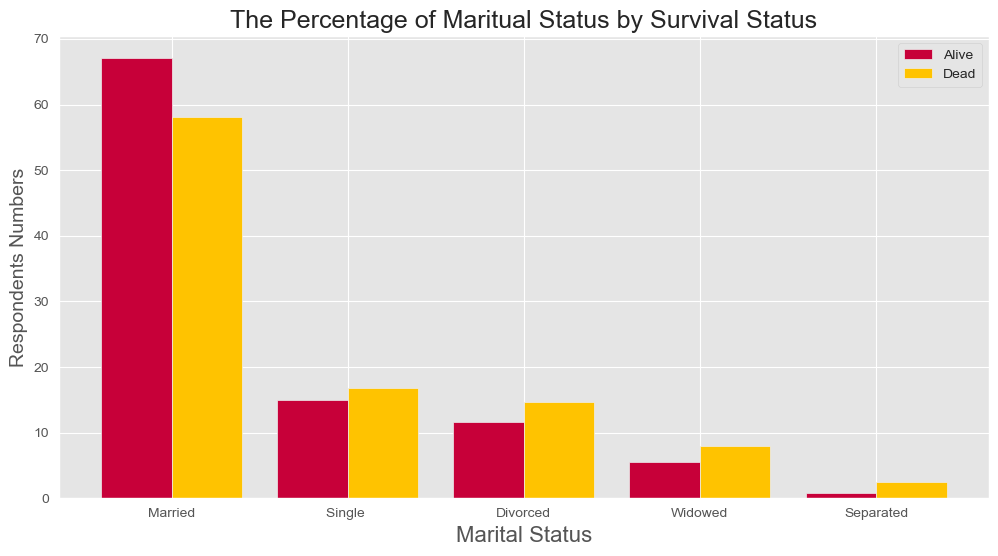

In [464]:
#Visualization of Question2
plt.figure(figsize = (12, 6))
width = 0.4
x=np.arange(len(alive))
plt.bar(x, alive, width =width,  color="#C70039")
plt.bar(x+width, dead, width = 0.4,  color="#FFC300")
plt.title('The Percentage of Maritual Status by Survival Status', fontsize=18)
plt.xlabel("Marital Status", fontsize=16)
plt.ylabel("Respondents Numbers",fontsize=14)
plt.xticks(x+width/2, alive.index)
plt.legend(["Alive","Dead"])
plt.savefig("Quest1.png")

In [ ]:
#Analysis: From the above grapgh we can see that the number of alive status and dead status of married females suffered to
#breast cancer are more compare to single, divorced, widowed, and separated status. The alive status of married females are 
#higher than their dead status. It means 67% of them have survived from the breast cancer. 
#Single females who suffered to breast cancer have a little higher dead status than alive status. It means, 16% of them
#couldnt survived from breast cancer and they died. Besdies, divorced females suffered to breast cancer have a little more
# dead status compare to alive status. It means that 11% of them survived from breast cancer. Widowed females who suffered to
# breast cancer have 5% of alive status. 5% of them survived from the breast cancer. Separated females are those who have the 
#lowest rate of breast cancer compare to other status. They have 2% of dead status. 
#As a result, we can say that married females suffered to breast cancer are more than other status. 

In [97]:
data.Tumor_Size.unique()
data.Tumor_Size.value_counts()

15     271
25     268
30     228
20     211
35     161
      ... 
98       1
88       1
87       1
117      1
67       1
Name: Tumor_Size, Length: 110, dtype: int64

In [95]:
# Question3: The number of Tumor size in each Marital_Status
tumorsize= data.groupby(['Marital_Status'])['Tumor_Size'].sum()
tumorsize

Marital_Status
Divorced     15379
Married      79410
Separated     1360
Single       19215
Widowed       7262
Name: Tumor_Size, dtype: int64

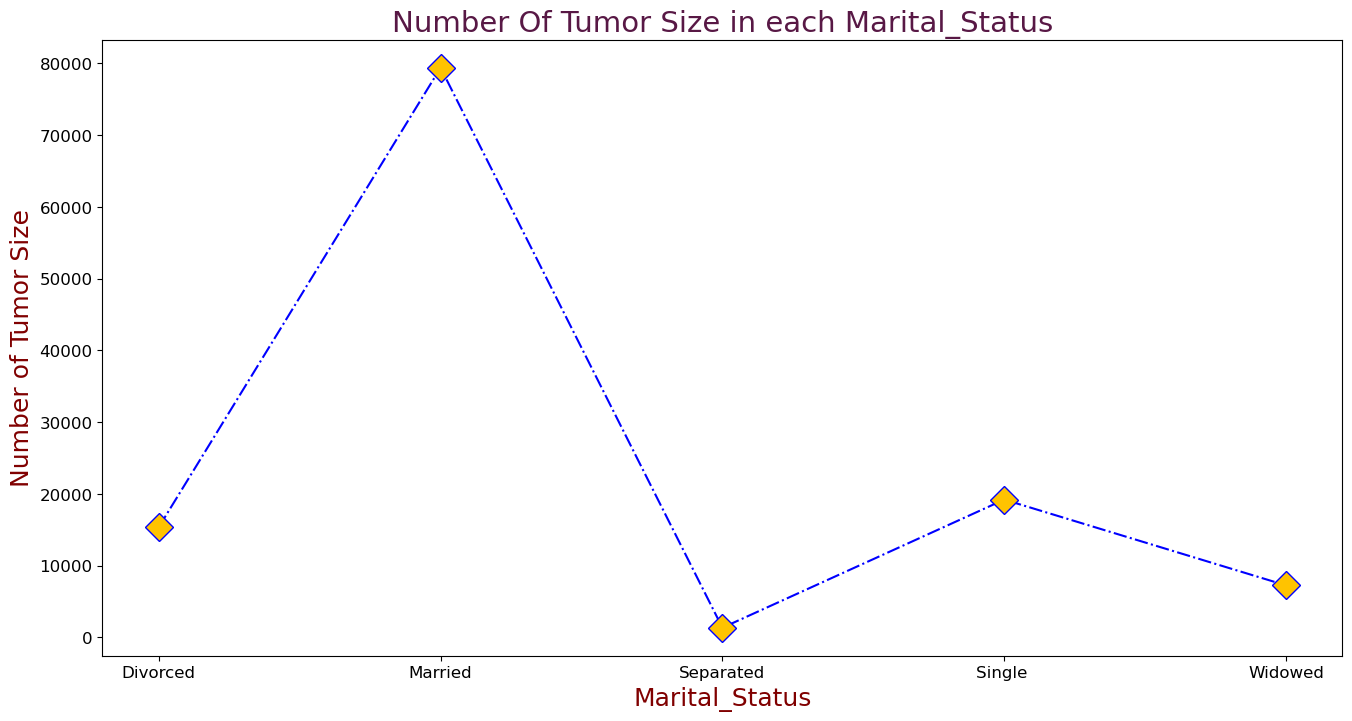

In [411]:
#Visualization of Question3
plt.figure(figsize = (16,8))
plt.rcParams.update({'font.size':12})
plt.plot(tumorsize,color= 'b', linestyle= "dashdot", marker="D", markersize=14, mfc='#FFC300')
plt.xlabel("Marital_Status", fontsize= 18,color="#800000")
plt.ylabel("Number of Tumor Size", fontsize= 18,color="#800000")
plt.title("Number Of Tumor Size in each Marital_Status", fontsize= 21,color="#581845")
style.use('default')
plt.savefig("Question3.png")

In [ ]:
##Analysis: From the above output and grapgh we can see that females with married status who suffered to breast cancer
#have the highest number of Tumor Size compare to single, separate, and divorced females. The total number of tumor size in Married 
#females are 79410. However, single females with breast cancer are 
# the second group who have the highest number of tumor size which is 19215. Divorced females with breast cancer are the third
#group who have the third highest number of tumor size which is 15379. After that, widowed females are the fourth group whose
#total tumor size is 7262.
# Lastly, Separated females with breast cancer are the last group with the lowest number of tumor size which is 1360. 

In [118]:
# Question4:The number of tumor size in each race. 
tumorsizerace= data.groupby(['Race'])['Tumor_Size'].sum()
tumorsizerace

Race
Black      8882
Other      9919
White    103825
Name: Tumor_Size, dtype: int64

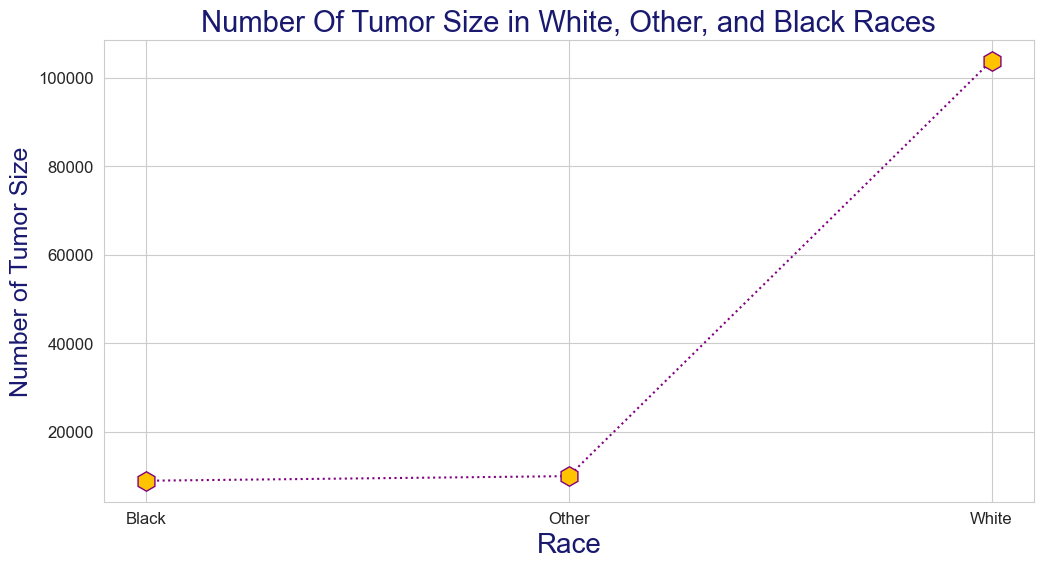

In [413]:
#Visualization of Question4
plt.figure(figsize = (12,6))
plt.rcParams.update({'font.size':12})
plt.plot(tumorsizerace,color= '#800080', linestyle= "dotted", marker="h", markersize=14, mfc='#FFC300')
plt.xlabel("Race", fontsize= 20,color="#191970")
plt.ylabel("Number of Tumor Size", fontsize= 18,color="#191970")
plt.title("Number Of Tumor Size in White, Other, and Black Races", fontsize= 21,color="#191970")
sns.set_style('whitegrid')
plt.savefig("Question4.png")

In [ ]:
# Analysis: From the above output and graph we can see that the number of tumor size for white race has the highest rate compare to 
# other races.The total number of tumor size for White race is 103825. However, the second race that has 9919 number of tumor size.
# Lastly, Black race is the last race that has the lowest number of tumor size which is 8882. 

In [138]:
data.Survival_Months.value_counts()

69     81
63     73
56     73
102    73
98     72
       ..
7       5
3       4
11      4
2       3
1       1
Name: Survival_Months, Length: 107, dtype: int64

In [137]:
data.Survival_Months.unique()

array([ 60,  62,  75,  84,  50,  89,  54,  14,  70,  92,  64,  56,  38,
        49, 105, 107,  77,  81,  78, 102,  98,  82,  86,  52,  90,  31,
        37, 103,  42,  61,  63,  39,  59,  71,  74,  73,  91, 106,  80,
        44,  85,  79, 104,  12,  95,  55, 101,  65,  72,  57,  87,  40,
        25,   8,  53,  58,  24,  66,  69,  93,  94, 100,  96,  41,  67,
        51,  13,  11,  47,  23,  45,  68,  76,  15,  16,  99,   7,  48,
        88,  34,  97,  83,  17,   3,  22,  30,   6,  32,   9,   5,  10,
        19,  18,  35,  27,  36,   4,  29,  33,  26,  20,  28,  43,   1,
        46,  21,   2], dtype=int64)

In [414]:
Marital_Survival= data.groupby('Marital_Status').max()['Survival_Months']
Marital_Survival

Marital_Status
Divorced     107
Married      107
Separated    100
Single       107
Widowed      107
Name: Survival_Months, dtype: int64

In [417]:
#Question 5: What is the percentage of Married, Single,Divorced, Separated, Widowed Status with highest Survival Months?
Marital_Survival= data.groupby('Marital_Status').max()['Survival_Months']
Marital_Survival
Marital_Survival= data.groupby('Marital_Status').max()['Survival_Months']*100/528
Marital_Survival

Marital_Status
Divorced     20.265152
Married      20.265152
Separated    18.939394
Single       20.265152
Widowed      20.265152
Name: Survival_Months, dtype: float64

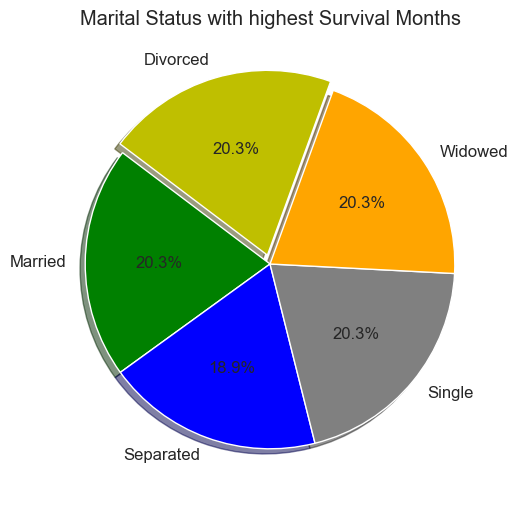

In [419]:
#Visualization of Question5
plt.figure(figsize = (6,6))

labels=["Divorced","Married","Separated","Single","Widowed"]
plt.pie(Marital_Survival, labels=labels, startangle =70, shadow=True, explode=[0.05,0.0,0.0,0.0,0.0], autopct="%2.1f%%",colors=['y','g','b','gray','orange'])
plt.title("Marital Status with highest Survival Months")
plt.savefig("Question5.png")

In [ ]:
#Analysis: From the above calculation and graph we can see that the percenatage of highest survival months for females with the
#Marital_Status of separated is 18.9% which is lower compare to the other Divorced, Widowed, Married,and Single.The percenatge
#of highest survival months for Divorced, Widowed, Married,and Single is the same which is 20.3%. 


In [164]:
data.A_Stage.value_counts()

Regional    3932
Distant       92
Name: A_Stage, dtype: int64

In [172]:
#Question6: What is the percentage of Single_Status,Married_Status,Divorced_Status,Widowed_Status,and Separated_Status based on A_Stage?
#Part1
R=data[(data["A_Stage"]=="Regional")].Marital_Status.value_counts()*100/3932
R1= R.round(decimals=2)
R1


Married      65.84
Single       15.21
Divorced     11.98
Widowed       5.90
Separated     1.07
Name: Marital_Status, dtype: float64

In [174]:
## Question6:Part2
D=data[(data["A_Stage"]=="Distant")].Marital_Status.value_counts()*100/92
D1= D.round(decimals=2)
D1


Married      58.70
Single       18.48
Divorced     16.30
Widowed       3.26
Separated     3.26
Name: Marital_Status, dtype: float64

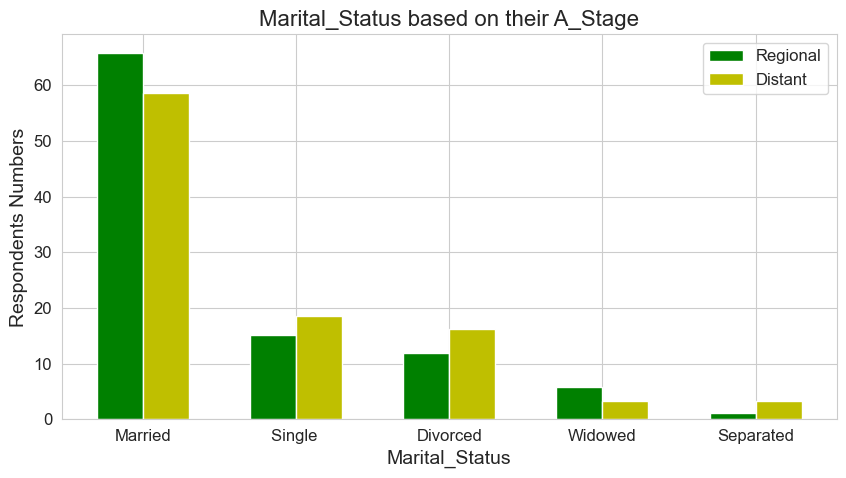

In [435]:
#Visualization of Question6:
plt.figure(figsize = (10, 5))
width = 0.3
x =np.arange(len(R))
plt.bar(x, R, width =width,  color="g")
plt.bar(x+width, D, width = 0.3,  color="y")
plt.title("Marital_Status based on their A_Stage", fontsize=16)
plt.xlabel("Marital_Status", fontsize=14)
plt.ylabel("Respondents Numbers",fontsize=14)
plt.xticks(x+width/2, R.index)
plt.legend(["Regional","Distant"])
plt.savefig("Question6.png")

In [ ]:
# A_Stage has two value: Regional means that the cancer has spread to lymph nodes or adjacent structures from the breast.
#Distant means that cancer has invaded distant organs such the lungs, liver, or bones.
#From the above grapgh and calculation we can see that females who are married has higher regional and distant StageA compare to
# to other status.  
# The regional Stage_A for the female with married status is higher than thier distant stage A and 65% of these females have
#regional Stage_A and the rest of them have distant Stage_A.It means that the cancer these females has spread to lymph nodes
#or adjacent structures from the breast.
# In single marital status,The distant Stage_A
# is higher than thier regional stage A. it means that 18% of these females have distant Stage_A which means thier cancer has
#invaded distant organs such the lungs, liver, or bones.
# The distant Stage_A for the female with divorced status is higher than thier regional stage A. It means that 16% of these
#females have distant Stage_A which means thier cancer has invaded distant organs such the lungs, liver, or bones. 
#The Regional Stage_A for the female with widowed status is higher than thier distant stage A. it means that their cancer has spread
#to lymph nodes or adjacent structures from the breast.
#.The distant Stage_A for the female with Separated
#status is higher than thier regional stage A. It means that their cancer has invaded distant organs such the lungs, liver, or bones.

In [191]:
#Question7:: What is the relationship between A_stage and Survival Status among White Race?
Female_Race = data[data["Race"]=="White"]
Astage_Status = Female_Race.groupby("A_Stage")["Status"].value_counts().unstack("Status")
Astage_Status

Status,Alive,Dead
A_Stage,,
Distant,48,29
Regional,2855,481


<Figure size 1500x800 with 0 Axes>

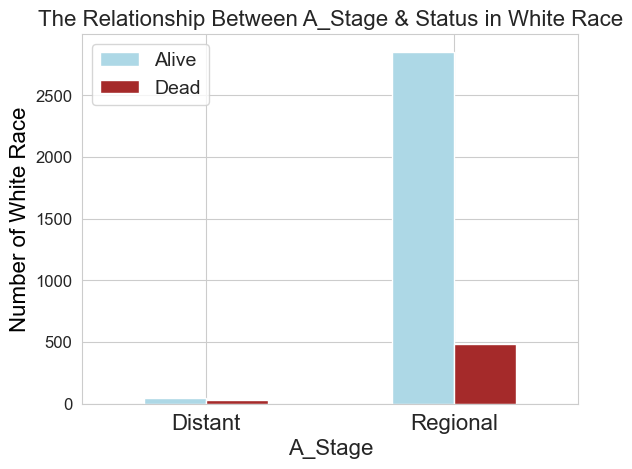

In [444]:
# Visualization of Question7:
plt.figure(figsize =(15,8))

Astage_Status.plot(kind="bar", color=["#ADD8E6","#A52A2A"])
plt.xticks(rotation=0, fontsize=16)
plt.xlabel("A_Stage",fontsize=16)
plt.ylabel("Number of White Race",fontsize=16,color='black')
plt.title("The Relationship Between A_Stage & Status in White Race",fontsize=16)
plt.legend(["Alive","Dead"], fontsize=14)
plt.savefig("Quest7.png")

In [ ]:
#Analysis: Stage_A=Regional means that the cancer has spread outside the breast to nearby structures or lymph nodes.
#Stage_A=Distant means the cancer has spread to distant parts of the body such as the lungs, liver or bones.
# Based on the above grapgh and calculation, we can see that the survival status(Alive&Dead) of white race with the Distant 
#StageA is the same. However, the number of white race with regional stageA has greater Alive status than the dead status. it means that
#cancer has spread outside the breast to nearby structures or lymph nodes of these race and they have high rate of alive status.


In [229]:
data.N_Stage.value_counts()

N1    2732
N2     820
N3     472
Name: N_Stage, dtype: int64

In [273]:
data.Grade.unique()

array(['3', '2', '1', ' anaplastic; Grade IV'], dtype=object)

In [274]:
data.Grade.value_counts()

2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: Grade, dtype: int64

In [278]:
data.Survival_Months.value_counts()

69     81
63     73
56     73
102    73
98     72
       ..
7       5
3       4
11      4
2       3
1       1
Name: Survival_Months, Length: 107, dtype: int64

In [281]:
data.Age.value_counts()

46    163
49    162
47    161
53    155
55    154
63    153
62    149
51    148
59    147
50    144
57    144
61    143
60    140
48    140
56    132
54    128
65    122
58    120
67    119
66    119
52    118
64    116
68    111
69    108
45    102
43     92
42     82
44     79
40     72
41     71
39     52
38     45
37     28
36     24
35     20
33     15
31     14
34     14
32     13
30      5
Name: Age, dtype: int64

In [282]:
# Question8: The number of Survival Months in each Marital_Status
survivalmonth= data.groupby(['Marital_Status'])['Survival_Months'].sum()
survivalmonth

Marital_Status
Divorced      34273
Married      190242
Separated      2786
Single        43310
Widowed       16292
Name: Survival_Months, dtype: int64

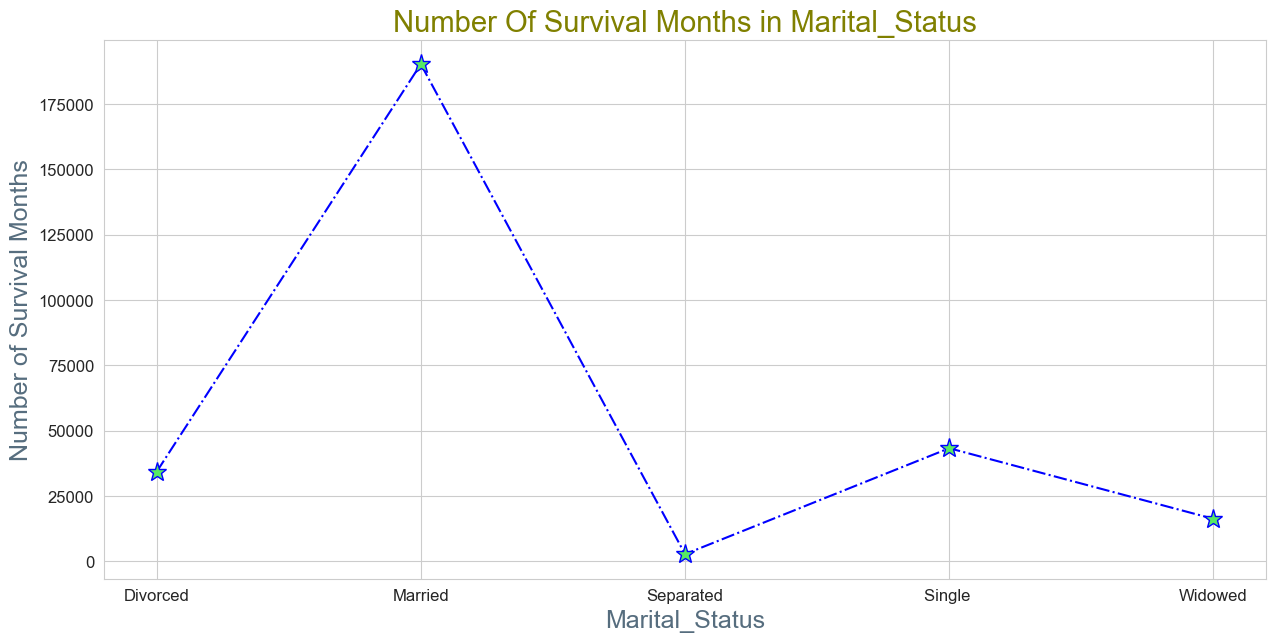

In [445]:
#Visualization of question8
plt.figure(figsize = (15,7))
plt.rcParams.update({'font.size':12})
plt.plot(survivalmonth,color= 'b', linestyle= "dashdot", marker="*", markersize=14, mfc='#57E964')
plt.xlabel("Marital_Status", fontsize= 18,color="#566D7E")
plt.ylabel("Number of Survival Months", fontsize= 18,color="#566D7E")
plt.title("Number Of Survival Months in Marital_Status", fontsize= 21,color="#808000")
style.use('ggplot')
plt.savefig("Question8.png")

In [ ]:
#Analysis: FRom the above grapgh and calculation, we can see that the Married females have the highest number of survival months
# which is 190242 compare to divorced,single,widowed,and separated females. Single females are the second heighest with the 
# 43310 survival months.Those females who are divorced have the third highest number of survival months which is 34273. Widowed
#females has the fourth highest survival months which is 16292. Separarated females are the ones which have the lowest 
# number of survival months. 

In [293]:
data.N_Stage.value_counts()

N1    2732
N2     820
N3     472
Name: N_Stage, dtype: int64

In [292]:
#Question9: How maritual Status has affected the N_Stage?
#part1
n1=data[data["N_Stage"]=="N1"].Marital_Status.value_counts()*100/2732
n1


Married      67.057101
Single       14.934114
Divorced     11.603221
Widowed       5.453880
Separated     0.951684
Name: Marital_Status, dtype: float64

In [294]:
n2=data[data["N_Stage"]=="N2"].Marital_Status.value_counts()*100/820
n2

Married      63.902439
Single       17.560976
Divorced     11.463415
Widowed       5.975610
Separated     1.097561
Name: Marital_Status, dtype: float64

In [295]:
n3=data[data["N_Stage"]=="N3"].Marital_Status.value_counts()*100/472
n3


Married      60.805085
Divorced     15.889831
Single       13.347458
Widowed       7.838983
Separated     2.118644
Name: Marital_Status, dtype: float64

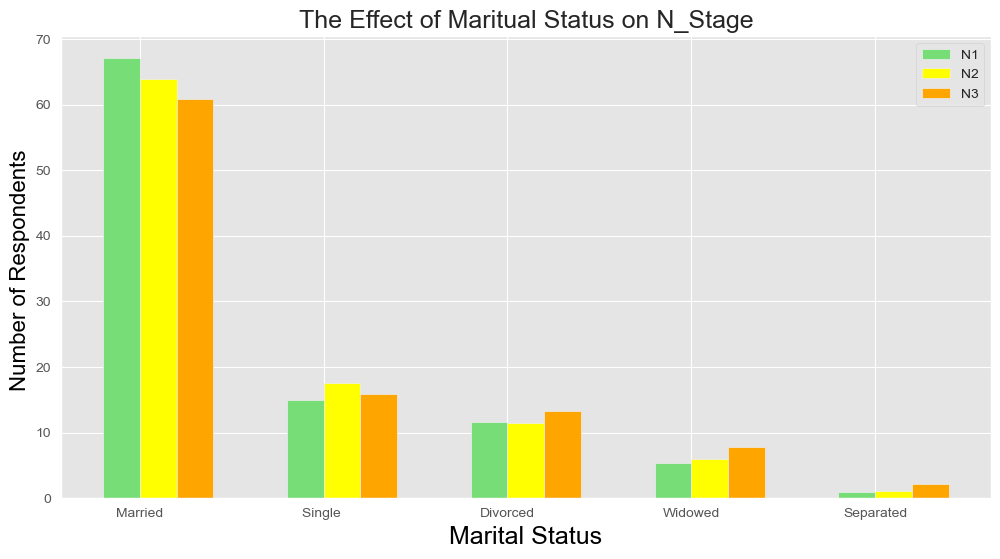

In [446]:
#Visualization of Question9
plt.figure(figsize = (12, 6))
width = 0.2
x=np.arange(len(n1))
plt.bar(x, n1, width =width,  color="#77DD77")
plt.bar(x+width,n2, width =0.2,  color="#FFFF00")
plt.bar(x+width+width, n3, width = 0.2,  color="Orange")
plt.title('The Effect of Maritual Status on N_Stage', fontsize=18)
plt.xlabel("Marital Status", fontsize=18, color='black')
plt.ylabel("Number of Respondents ",fontsize=16,color='black')
plt.xticks(x+width/2, alive.index)
style.use('ggplot')
plt.legend(["N1","N2","N3"])
plt.savefig("Question9.png")

In [318]:
#Analysis: N1, N2,and N3 are the location and number of lymph nodes that has cancer. The greater is the number after the N,
#the more lymph nodes contain cancer.
#The above calculation and grapgh indicates that N1, N2, and N3 for female with married status is higher compare to the N1, N2, 
#N3 of divorced,single,widowed,and separated females.Therefore,lymph nodes of female with married status contain  more cancer 
#than divorced,single,widowed, and separated females.Single females are the second group whose N1, N2, N3 is a little bit higher
#than the N1, N2, N3 of divorced females, but higher than the N1, N2, N3 of widowed and separated females.Single females has
#lower N1 but greater N2 and N3.It means lymph nodes of female with single status contain  more cancer than  lymph nodes of 
#Divorced,widowed, and separated females.
# Divorced females have less N1 and N2 , but a little bit more N3. It means lymph nodes of these females contain  more cancer 
#than the lymph nodes of widowed, and separated females. On the other hand, Separated females has the lowest N1, N2, and N3. 
#Therefore, their lymph nodes contain less cancer compare to lymph nodes of other status. 


In [320]:
data.Tumor_Size.unique()

array([  4,  35,  63,  18,  41,  20,   8,  30, 103,  32,  13,  59,  15,
        19,  46,  24,  25,  29,  40,  70,  22,  50,  17,  21,  10,  27,
        23,   5,  51,   9,  55, 120,  77,   2,  11,  12,  26,  75, 130,
        34,  80,   3,  60,  14,  16,  45,  36,  76,  38,  49,   7,  72,
       100,  43,  62,  37,  68,  52,  85,  57,  39,  28,  48, 110,  65,
         6, 105, 140,  42,  31,  90, 108,  98,  47,  54,  61,  74,  33,
         1,  87,  81,  58, 117,  44, 123, 133,  95, 107,  92,  69,  56,
        82,  66,  78,  97,  88,  53,  83, 101,  84, 115,  73, 125, 104,
        94,  86,  64,  96,  79,  67], dtype=int64)

In [321]:
data.Tumor_Size.value_counts()

15     271
25     268
30     228
20     211
35     161
      ... 
98       1
88       1
87       1
117      1
67       1
Name: Tumor_Size, Length: 110, dtype: int64

In [324]:
#Question10:  What are the highest rate of tumor size by race? 
race1= data.groupby('Race').max()['Tumor_Size'].nlargest(3)
race1

Race
White    140
Black    130
Other    130
Name: Tumor_Size, dtype: int64

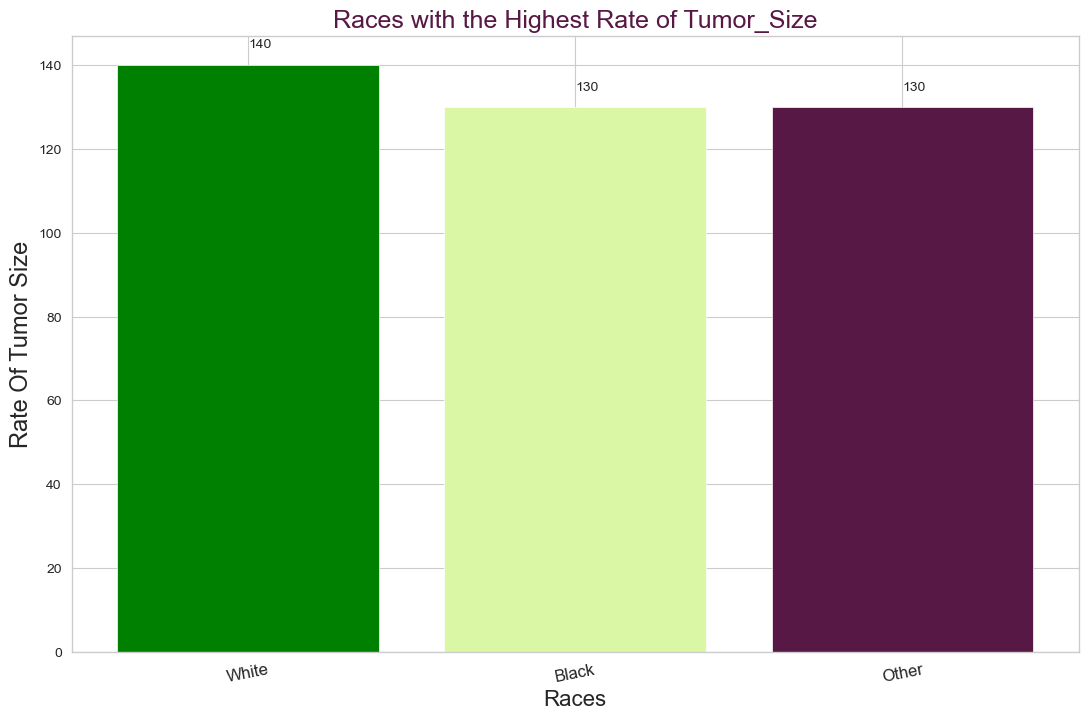

In [452]:
#Visualization of Question10
plt.figure(figsize = (13,8))
x= range(len(race1))
ax = plt.axes();
ax.bar(x,race1, color=['g','#DAF7A6','#581845'], width=0.8,label="race1")
plt.title("Races with the Highest Rate of Tumor_Size",fontsize=18,color='#581845')
plt.xticks(x,race1.index, rotation=11, fontsize=12)
plt.xlabel("Races", fontsize=16)
plt.ylabel("Rate Of Tumor Size", fontsize=17)
sns.set_style('whitegrid')
plt.savefig("question10.png")
for x in ax.patches:
    wid=x.get_width()
    hei=x.get_height()
    x,y=x.get_xy()
    
    ax.annotate(hei, (x+ wid/2, y+ hei*1.03))

In [451]:
#Analysis: From the above calculation we can see that White Race has highest rate of tumor size which is 140 compare to Black
# and other Races. On the other hand, Black and other races have the same rate of tumor size which is 130.

In [453]:
#Question11: The numberes of tumor size for each Marital Status in Black race?
blackrace = data[data['Race'] == 'Black']
blackrace

,Age,Race,Marital_Status,T Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,RegionalNode_Examined,ReginolNode_Positive,Survival_Months,Status
18,48,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,16,1,107,Alive
43,53,Black,Single,T2,N2,IIIA,Poorly differentiated,3,Regional,23,Positive,Negative,15,6,84,Alive
52,60,Black,Married,T3,N1,IIIA,Poorly differentiated,3,Regional,120,Positive,Negative,7,1,86,Alive
72,31,Black,Married,T2,N1,IIB,Poorly differentiated,3,Regional,30,Positive,Positive,16,1,52,Alive
108,38,Black,Single,T2,N1,IIB,Moderately differentiated,2,Regional,21,Positive,Positive,8,2,106,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,54,Black,Married,T1,N1,IIA,Poorly differentiated,3,Regional,13,Positive,Positive,5,1,81,Alive
3969,66,Black,Widowed,T1,N1,IIA,Moderately differentiated,2,Regional,12,Positive,Negative,10,1,21,Dead
3992,42,Black,Married,T2,N3,IIIC,Poorly differentiated,3,Regional,38,Positive,Positive,23,19,29,Dead
4010,59,Black,Single,T2,N1,IIB,Poorly differentiated,3,Regional,23,Positive,Negative,6,1,27,Dead


In [456]:
Marital_Size= blackrace.groupby(['Marital_Status'])['Tumor_Size'].sum()
Marital_Size

Marital_Status
Divorced     1263
Married      3388
Separated     284
Single       3168
Widowed       779
Name: Tumor_Size, dtype: int64

In [455]:
Marital_Size= blackrace.groupby(['Marital_Status'])['Tumor_Size'].sum()
Marital_Size

Marital_Status
Divorced     1263
Married      3388
Separated     284
Single       3168
Widowed       779
Name: Tumor_Size, dtype: int64

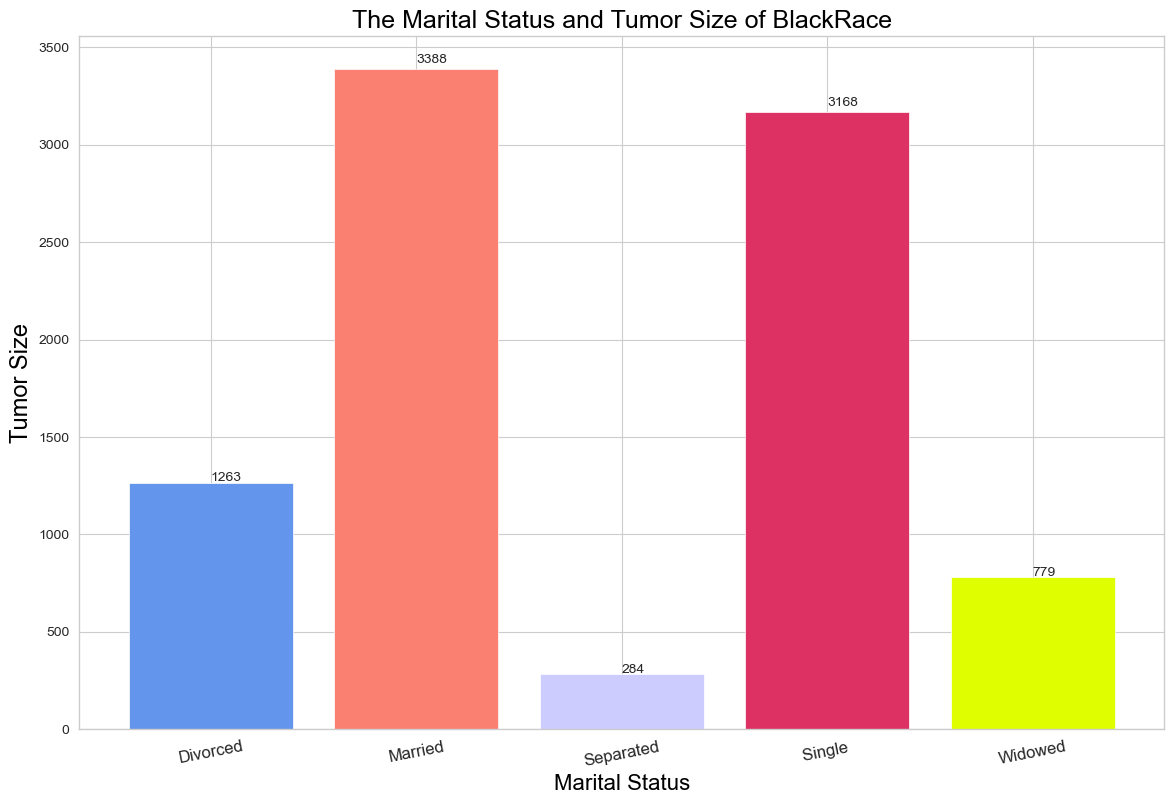

In [457]:
#Visualization of Question 11
plt.figure(figsize = (14,9))
x= range(len(Marital_Size))
ax = plt.axes();
ax.bar(x,Marital_Size, color=['#6495ED','#FA8072','#CCCCFF','#DE3163','#DFFF00'], width=0.8,label="Marital_Size")
plt.title("The Marital Status and Tumor Size of BlackRace",fontsize=18,color='black')
plt.xticks(x,Marital_Size.index, rotation=11, fontsize=12)
plt.xlabel("Marital Status", fontsize=16,color='black')
plt.ylabel("Tumor Size", fontsize=17,color='black')
style.use('ggplot')
plt.savefig("question11.png")
for x in ax.patches:
    wid=x.get_width()
    hei=x.get_height()
    x,y=x.get_xy()
    
    ax.annotate(hei, (x+ wid/2, y+ hei*1.01))

In [ ]:
#Analysis: From the above calculation and graph we can see that Black race with the married status has the highest number
# of tumor size which is 3388 compare to other marital status. Females from Black race with the single marital status has 
# the second highest number of tumor size which is 3168.
# Females from Black race with the divorced marital status has the third highest number of tumor size which is 1263. 
# Females from Black race with the Widowed marital status has the fourth highest number of tumor size which is 779. 
#Lastly, Females from black race with the separated marital status has the lowest number of tumor size which is 284.  

In [ ]:
#Question12: What is the numbers of Age for each race with Married-status?

In [343]:
marriedstatus = data[data['Marital_Status'] == 'Married']
marriedstatus

,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,RegionalNode_Examined,ReginolNode_Positive,Survival_Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4017,46,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,28,Negative,Negative,2,1,19,Dead
4018,64,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,10,Positive,Positive,11,1,70,Alive
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive


In [346]:
Race_Age= marriedstatus.groupby(['Race'])['Age'].sum()
Race_Age

Race
Black      5909
Other     12055
White    123806
Name: Age, dtype: int64

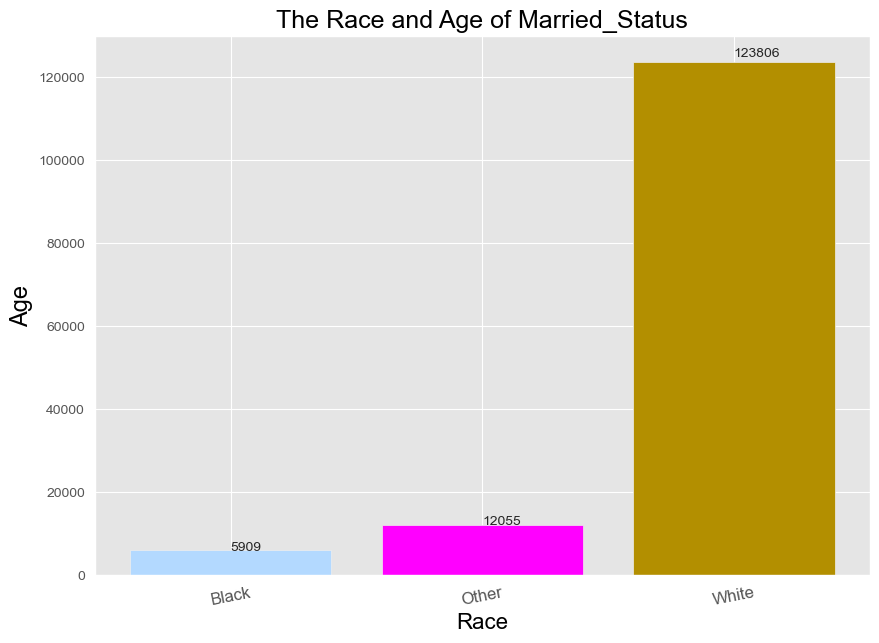

In [462]:
#Visualization of question12
plt.figure(figsize = (10,7))
x= range(len(Race_Age))
ax = plt.axes();
ax.bar(x,Race_Age, color=['#b3d9ff','#ff00ff','#b38f00'], width=0.8,label="Race")
plt.title("The Race and Age of Married_Status",fontsize=18,color='black')
plt.xticks(x,Race_Age.index, rotation=11, fontsize=12)
plt.xlabel("Race", fontsize=16,color='black')
plt.ylabel("Age", fontsize=17,color='black')
style.use('ggplot')
plt.savefig("question12.png")
for x in ax.patches:
    wid=x.get_width()
    hei=x.get_height()
    x,y=x.get_xy()
    
    ax.annotate(hei, (x+ wid/2, y+ hei*1.01))

In [461]:
#Analysis: From the above graph we can see that the number of ages of married females from white race is more compare to black 
#and other races. The number of ages of married females from white race is 123806. After that, Married females from other race has
#the second highest age which is  12055. Lastly, married females from black race has the lowest number of ages which is 5909.

